# Ch 0. Python與機器學習
## 0-4. 基礎數學與Python實作
[0-4-3. 機率](#sec0_4_3)
***

<a id='sec0_4_3'></a>
### 0-4-3. 機率

出現次數：
4    180
1    168
6    167
5    164
2    161
3    160
dtype: int64
出現頻率：
 1    0.168
2    0.161
3    0.160
4    0.180
5    0.164
6    0.167
dtype: float64


<BarContainer object of 6 artists>

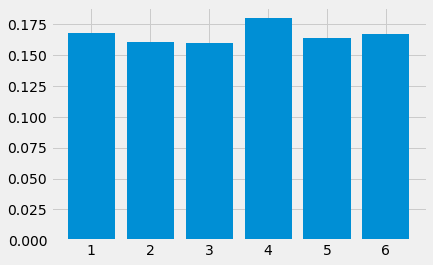

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# 均勻分佈(e.g. 擲骰子)
size = 1000
dice = np.random.choice(range(1, 7), size=size, replace=True, 
                        p=[1/6]*6)
print('出現次數：')
print(pd.Series(dice).value_counts())

freq = pd.Series(dice).value_counts()/size
freq.sort_index(inplace=True)
print('出現頻率：\n', freq)

plt.bar(range(1, 7), freq)

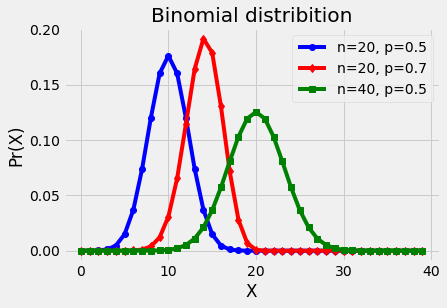

In [2]:
from scipy import stats

k = np.arange(40)
params = [[20, 0.5], [20, 0.7], [40, 0.5]]
style = ['o-b', 'd-r', 's-g']

for i, param in enumerate(params):
    plt.plot(k, stats.binom(param[0], param[1]).pmf(k), style[i], 
             label='n={}, p={}'.format(param[0], param[1]))

plt.title('Binomial distribition')
plt.legend()
plt.xlabel('X')
plt.ylabel('Pr(X)');

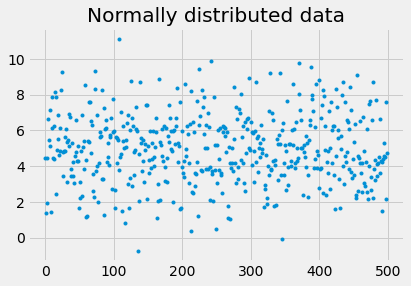

Text(0.5, 1.0, 'Histogram of normally distributed data')

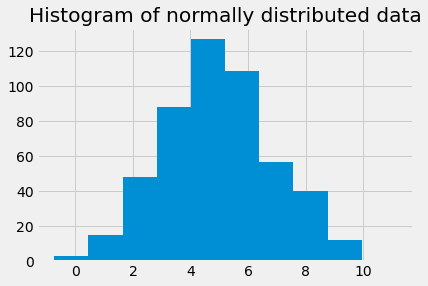

In [3]:
size = 500
data = stats.norm.rvs(5, 2, size=size)
plt.plot(data, '.')
plt.title('Normally distributed data')
plt.show()

plt.hist(data)
plt.title('Histogram of normally distributed data')

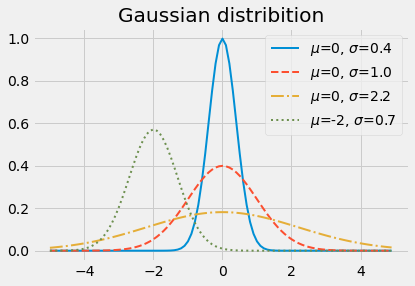

In [4]:
size = 100
params = [[0, 0.4], [0, 1.], [0, 2.2], [-2, 0.7]]
x = np.arange(-5, 5, 0.1)
style = ['-', '--', '-.', ':']

for i, param in enumerate(params):
    y = stats.norm(param[0], param[1]).pdf(x)
    plt.plot(x, y, lw=2, ls=style[i],
             label=r'$\mu$={}, $\sigma$={}'.format(param[0], param[1]))

plt.title('Gaussian distribition')
plt.legend();

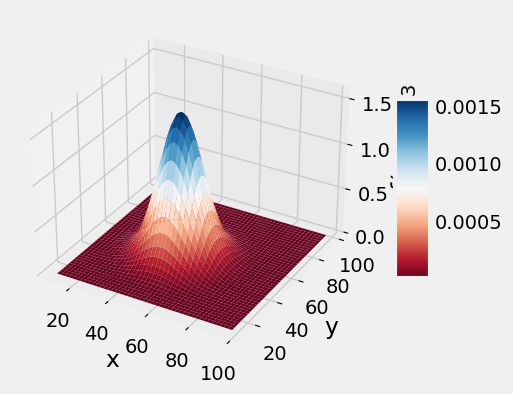

In [5]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# 產生資料
x, y = np.mgrid[10:100:2, 10:100:2]

pos = np.empty(x.shape + (2,))
pos[:, :, 0], pos[:, :, 1] = x, y

# 設定 x, y 的平均分別為 50, 50
# 共變異矩陣則為 [[100,0], [0,100]]
rv = multivariate_normal([50,50], [[100,0], [0,100]])

# 二元常態分佈的機率密度函數
z = rv.pdf(pos)

fig = plt.figure(dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.RdBu)

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

ax.ticklabel_format(style='sci', axis='z', scilimits=(0,0))
plt.tight_layout();

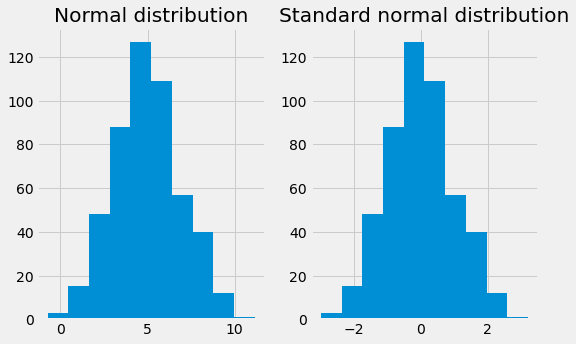

In [6]:
# 常態分佈
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.hist(data)
plt.title('Normal distribution')

# 標準常態分佈
plt.subplot(1, 2, 2)
data_std = (data-data.mean())/data.std()
plt.hist(data_std)
plt.title('Standard normal distribution');

In [7]:
tw50 = pd.read_csv('tw50.csv')
print(tw50.head(2))
print(tw50.tail(2))
print('==============')

ret = tw50['ROI']
ret_mean = ret.mean()
ret_std = ret.std()
print('Mean =', ret_mean)
print('Std =', ret_std)
print('==============')

# 查詢累積密度值為 0.05 的分位數
print(stats.norm.ppf(0.05, ret_mean, ret_std))

        Date     Price     ROI
0  2020/9/28  10005.28  0.0198
1  2020/9/25   9810.80  0.0002
           Date    Price     ROI
1223  2015/10/1  6131.52  0.0143
1224  2015/9/30  6044.95  0.0083
Mean = 0.00047012244897959163
Std = 0.010304558547753459
-0.016479368052426484
